<a href="https://colab.research.google.com/github/vladjkezor/Python-for-data-analysis/blob/hw_7/hw_7_python_data_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm.notebook import tqdm
import pandas as pd

In [12]:
base_url = 'https://lifehacker.ru/topics/technology/'

Посмотрел другие страницы, там добавляется **/?page=№страницы**, например https://lifehacker.ru/topics/technology/?page=2, на первой странице также работает https://lifehacker.ru/topics/technology/?page=1







In [13]:
paginaton = '/?page='

Тут мы видим в классе "lh-small-article-card__link" тэг <a> с ссылкой и тайтлом статьи

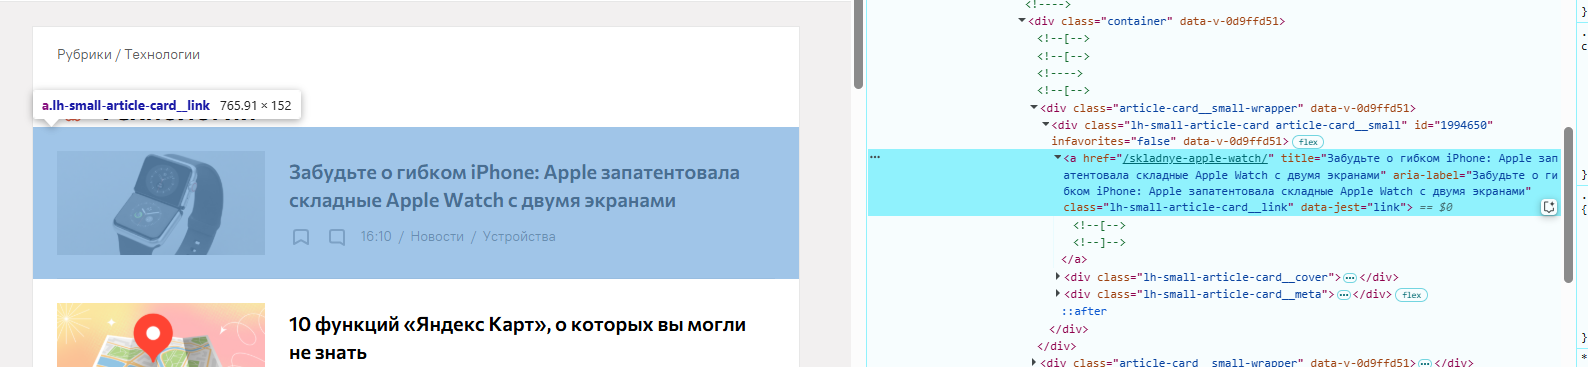

Получаем ссылки и названия статей первых 10 страниц и записываем их в массив

In [14]:
links = []
for i in tqdm(range(1, 11)):
    response = requests.get(base_url + paginaton + 'i')
    soup = BeautifulSoup(response.text, 'lxml' )
    items = soup.find_all('a', class_='lh-small-article-card__link')
    links.extend((item.get('href'), item.get('title')) for item in items)

  0%|          | 0/10 [00:00<?, ?it/s]

In [15]:
links[:5]

[('/skladnye-apple-watch/',
  'Забудьте о гибком iPhone: Apple запатентовала складные Apple Watch с двумя экранами'),
 ('/yandeks-karty-funkcii/',
  '10 функций «Яндекс Карт», о которых вы могли не&nbsp;знать'),
 ('/one-ui-7-poluchat-bolshe-ustroistv/',
  'One UI 7 на базе Android 15 получат больше устройств Samsung, чем предполагалось'),
 ('/anons-xgimi-play-6/',
  'XGIMI представила портативные проекторы Play 6 и Play 6e с поворотным креплением'),
 ('/golosovye-modeli-openai/',
  'OpenAI представила голосовые модели нового поколения — можно бесплатно озвучить текст на русском')]

Соответственно ссылки на статьи оформляются вот так:

```
'https://lifehacker.ru/'+'ссылка из articles'
```





In [16]:
result = []

for link in tqdm(links):
    article = {}
    article['title'] = link[1]

    response = requests.get('https://lifehacker.ru/' + link[0])
    soup = BeautifulSoup(response.text, 'lxml')
    article['text'] = soup.find('article', class_ = 'single-article__post-content single-article__content-container').text
    result.append(article)


  0%|          | 0/300 [00:00<?, ?it/s]

In [22]:
pd.set_option('display.max_colwidth', 300)
df = pd.DataFrame(result)
df.sample(5)

,title,text
149,9 беспроводных наушников с хорошими скидками на «Великой китайской распродаже» AliExpress,"17 марта на AliExpress стартовала «Великая китайская распродажа» с отличными скидками на технику проверенных брендов — и наушники в том числе. Прошерстили маркетплейс и нашли удачные предложения в разных формфакторах. Распродажа продлится до 27 марта, но конкретные модели и расцветки могут закон..."
100,Робот Atlas от Boston Dynamics освоил брейк-данс и впечатлил акробатикой,"Компания Boston Dynamics опубликовала новый ролик, в котором её робот-гуманоид Atlas демонстрирует серию сложных движений, включая элементы брейк-данса. Также он научился выполнять акробатические прыжки, делать колесо и даже кувырки.Для этого использовалась методика обучения с подкреплением, при..."
207,Аналитик: складной iPad с 18-дюймовым экраном будет работать на&nbsp;macOS,"Аналитик Джефф Пу утверждает, что крупный складной планшет Apple, разрабатываемый как гибрид MacBook и iPad, может получить полноценную macOS вместо iPadOS.В отчёте инвестиционной компании GF Securities он сообщил, что Apple готовит два складных устройства: iPhone с 7,8‑дюймовым экраном и гигант..."
285,Telegram достиг миллиарда пользователей — теперь это второй по популярности мессенджер в&nbsp;мире,"Павел Дуров заявил, что количество ежемесячных активных пользователей Telegram теперь значительно превышает миллиард. Это делает мессенджер вторым по популярности в мире, если не учитывать доступный исключительно в Китае WeChat.Впереди нас стоит WhatsApp — дешёвая имитация Telegram. Годами они о..."
67,Huawei представила FreeBuds 6 — наушники-вкладыши с объёмным звуком и шумоподавлением,"Huawei вместе со складным смартфоном Pura X анонсировала беспроводные наушники FreeBuds 6, которые выделяются полуоткрытой конструкцией, двухдрайверной системой и продвинутым активным шумоподавлением. Последнее снижает уровень внешних помех до 95 дБ и минимизирует влияние ветра скоростью до 8 м/..."
